In [1]:
# using plaidml to connect to my eGPU
import os

os.environ["KERAS_BACKEND"] = "plaidml.keras.backend"

In [2]:
# read csv file into a pandas dataframe
import numpy as np
import pandas as pd

train = pd.read_csv('AID373red_train.csv')
test = pd.read_csv('AID373red_test.csv')
test.head(5)

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_01_POS,NEG_03_POS,NEG_04_POS,...,WBN_LP_H_1.00,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome
0,0,0,0,0,0,0,0,0,0,0,...,3.87685,4.076,41.05,2,2,1,324.815,1,0,Active
1,0,0,0,0,0,0,0,0,0,0,...,4.06924,4.121,98.30,8,5,2,444.539,0,0,Active
2,0,0,0,0,0,0,0,0,0,0,...,4.06101,4.281,114.07,6,3,2,379.489,0,0,Active
3,0,0,0,0,0,0,0,0,0,0,...,3.87996,3.606,52.49,4,3,1,368.868,1,0,Active
4,0,0,0,0,0,0,0,0,0,0,...,3.87912,2.826,105.99,4,2,1,420.542,0,0,Active


In [3]:
# Function for converting categorical label into a numerical one
def outcome_to_numeric(x):
    if x=='Inactive':
        return 0
    if x=='Active':
        return 1

In [4]:
# Apply function to label column
train['label'] = train['Outcome'].apply(outcome_to_numeric)
test['label'] = test['Outcome'].apply(outcome_to_numeric)
test.head()

,NEG_01_NEG,NEG_02_NEG,NEG_03_NEG,NEG_04_NEG,NEG_05_NEG,NEG_06_NEG,NEG_07_NEG,NEG_01_POS,NEG_03_POS,NEG_04_POS,...,XLogP,PSA,NumRot,NumHBA,NumHBD,MW,BBB,BadGroup,Outcome,label
0,0,0,0,0,0,0,0,0,0,0,...,4.076,41.05,2,2,1,324.815,1,0,Active,1
1,0,0,0,0,0,0,0,0,0,0,...,4.121,98.30,8,5,2,444.539,0,0,Active,1
2,0,0,0,0,0,0,0,0,0,0,...,4.281,114.07,6,3,2,379.489,0,0,Active,1
3,0,0,0,0,0,0,0,0,0,0,...,3.606,52.49,4,3,1,368.868,1,0,Active,1
4,0,0,0,0,0,0,0,0,0,0,...,2.826,105.99,4,2,1,420.542,0,0,Active,1


In [5]:
# Drop categorical column
train=train.drop('Outcome', axis=1)
test=test.drop('Outcome', axis=1)

In [6]:
# Split datasets into feature and label dataframes
x_train = train.drop('label', axis=1)
y_train = train['label']

x_test = test.drop('label', axis=1)
y_test = test['label']

/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


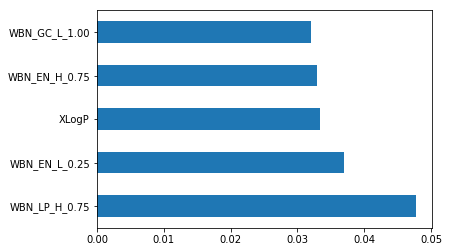

In [7]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
%matplotlib inline

model = ExtraTreesClassifier()
model.fit(x_train, y_train)

feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
feat_importances.nlargest(5).plot(kind='barh')
plt.show()

In [8]:
x_train = x_train[['WBN_GC_L_1.00', 'WBN_EN_H_0.75', 'XLogP', 'WBN_EN_H_0.25', 'WBN_LP_H_0.75']]

x_test = x_test[['WBN_GC_L_1.00', 'WBN_EN_H_0.75', 'XLogP', 'WBN_EN_H_0.25', 'WBN_LP_H_0.75']]

In [12]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.layers.noise import AlphaDropout
from keras import optimizers
from keras import layers


model = Sequential()
model.add(Dense(64, input_dim=5, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

opt = optimizers.Adadelta(lr=.01)

model.compile(loss='binary_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

In [13]:
model.fit(x_train, y_train,
          epochs=10,
          batch_size=128)

Epoch 1/10
47831/47831 [==============================] - 2s 38us/step - loss: 0.3152 - acc: 0.9840
Epoch 2/10
47831/47831 [==============================] - 2s 37us/step - loss: 0.1054 - acc: 0.9990
Epoch 3/10
47831/47831 [==============================] - 2s 41us/step - loss: 0.0336 - acc: 0.9990
Epoch 4/10
47831/47831 [==============================] - 2s 39us/step - loss: 0.0156 - acc: 0.9990
Epoch 5/10
47831/47831 [==============================] - 2s 39us/step - loss: 0.0112 - acc: 0.9990
Epoch 6/10
47831/47831 [==============================] - 2s 36us/step - loss: 0.0104 - acc: 0.9990
Epoch 7/10
47831/47831 [==============================] - 2s 34us/step - loss: 0.0105 - acc: 0.9990
Epoch 8/10
47831/47831 [==============================] - 2s 34us/step - loss: 0.0103 - acc: 0.9990
Epoch 9/10
47831/47831 [==============================] - 2s 34us/step - loss: 0.0104 - acc: 0.9990
Epoch 10/10
47831/47831 [==============================] - 2s 34us/step - loss: 0.0100 - acc: 0.9990

In [14]:
score = model.evaluate(x_test, y_test, batch_size=128)

11957/11957 [==============================] - 1s 48us/step


In [15]:
score

[0.008817751688371638, 0.9989964037802125]